# Выявление определяющих успешность игры закономерностей.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.  Необходимо выявить определяющие успешность игры закономерности.

## План работы:
<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
На первом этапе импортируем необходимые библиотеки и читаем файл, знакомимся с общей информацией.<br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
На втором шаге обрабатываем данные: приводим столбцы к нижнему регистру, изменяем типы данных, заполняем пропуски, добавляем необходимые фичи.<br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
Проводим исследовательский анализ.<br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
Составляем рисунок пользователя каждого региона.<br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
Проверяем необходимые гипотезы.<br>
<a href='#step_5'>Вывод.</a>

## Получение общей информации.

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step_5'>Вывод.</a>

<a id = 'step_1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


С первого взгляда на таблицу можно заметить разный регистр в названиях столбцов, пропуски в данных, количество копий в млн. неудобно для дальенйших расчетов, оценки критиков и пользователей в разных форматах.

## Предобработка данных.

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step_5'>Вывод.</a>

<a id = 'step_2'></a>

In [4]:
df.columns = df.columns.str.lower()
print(df.columns)
df['platform'].unique()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Приведение к нижнему регистру и проверка глазами возможных наименований платформы на наличие разных регистров у одного названия.

In [5]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

year_of_release надо перевести в int, все *_sales в int с домножением на миллион, critic_score в int, user_score в int с домножением на 10 (одинаковый формат с оценками критиков)

In [6]:
columns = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']
df[['na_sales', 'eu_sales', 'jp_sales']] = df[['na_sales', 'eu_sales', 'jp_sales']] * 1000000
df[columns] = df[columns].apply(lambda x: (x.round().astype('Int64')))
user_score = []
for cell in df['user_score'].values:
    try:
        cell = (pd.to_numeric(cell) * 10).astype('Int64')
        user_score.append(cell)
    except:
        user_score.append(cell)
df['user_score'] = user_score

In [7]:
df.dtypes

name               object
platform           object
year_of_release     Int64
genre              object
na_sales            Int64
eu_sales            Int64
jp_sales            Int64
other_sales         Int64
critic_score        Int64
user_score         object
rating             object
dtype: object

Изменил все типы на int. 'user_score' оставил object, но все числовые значения в столбце - int.

In [8]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [9]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1780000,530000,0,0,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0,0,30000,0,NaN,NaN,NaN


пропуски в name и genre это видимо одна и та же игра, удалим её, потеря не значима.<br>

In [10]:
df.dropna(subset = ['name','genre'], inplace = True)

In [11]:
len(df)

16713

In [12]:
na_of_year = df[df['year_of_release'].isna() == True]

In [13]:
def find_of_year(row):
    words = row.loc['name'].split()
    for word in words:
        if (word.isdigit()) & (len(word) == 4):
            row['year_of_release'] = int(word) - 1
    return row
na_of_year = na_of_year.apply(find_of_year,axis = 1)
na_of_year['year_of_release'] = na_of_year['year_of_release'].astype('Int64')

Заполнил пропуски в годах игр, в названии которых указан год. Из года в названии надо вычесть единицу, потому что обычно игры выпускались на год раньше, чем указан в названии. Все подобные игры это симуляторы спорта.

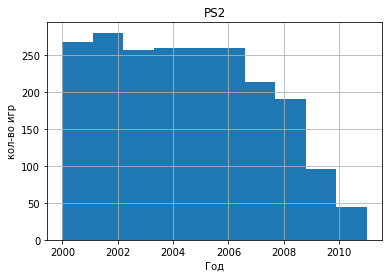

mean = 2004.5839210155148
median = 2005.0
----------------------------------------


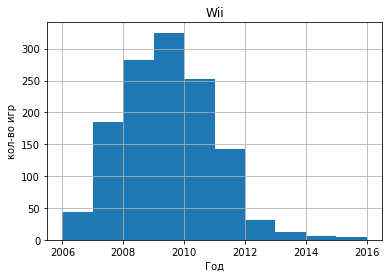

mean = 2008.966562986003
median = 2009.0
----------------------------------------


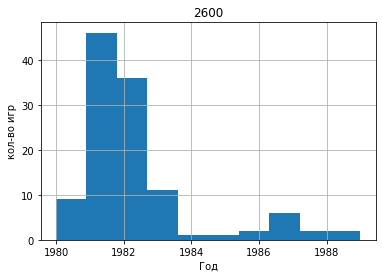

mean = 1982.1379310344828
median = 1982.0
----------------------------------------


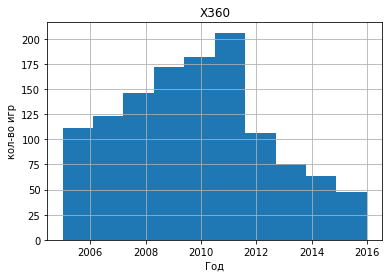

mean = 2009.8806818181818
median = 2010.0
----------------------------------------


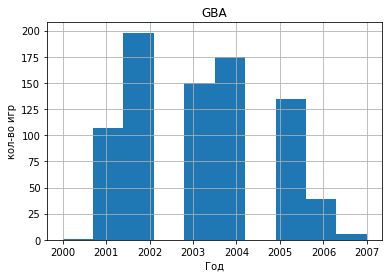

mean = 2003.2108508014796
median = 2003.0
----------------------------------------


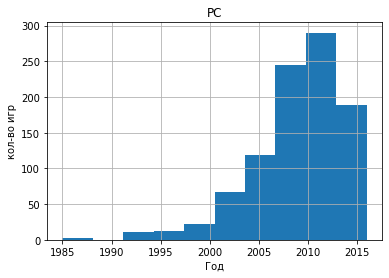

mean = 2008.914315569488
median = 2010.0
----------------------------------------


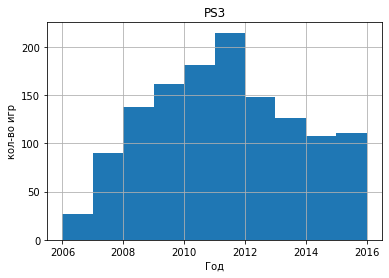

mean = 2010.8407350689126
median = 2011.0
----------------------------------------


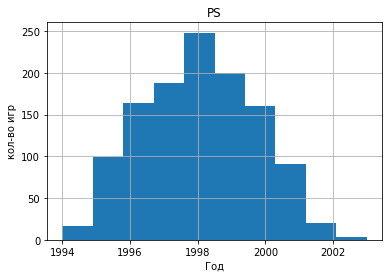

mean = 1998.0058823529412
median = 1998.0
----------------------------------------


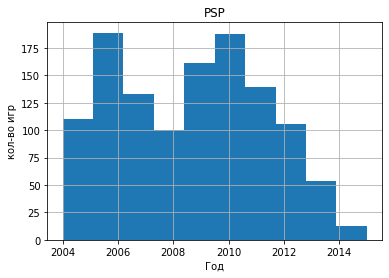

mean = 2008.731768650461
median = 2009.0
----------------------------------------


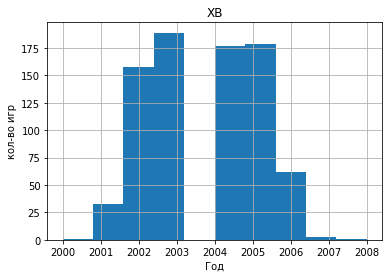

mean = 2003.6363636363637
median = 2004.0
----------------------------------------


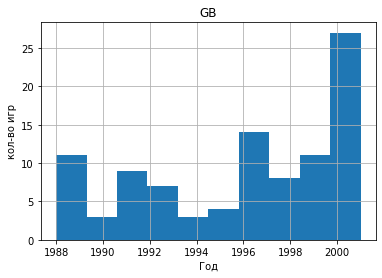

mean = 1995.958762886598
median = 1997.0
----------------------------------------


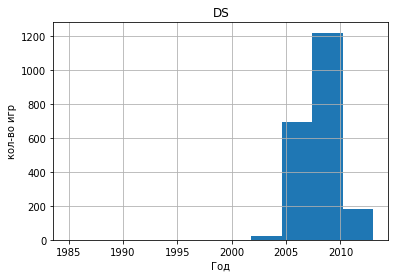

mean = 2008.1852899575672
median = 2008.0
----------------------------------------


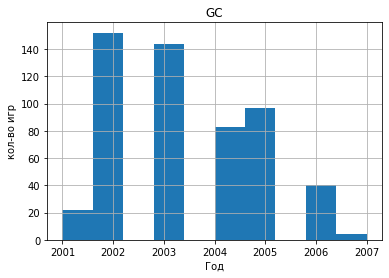

mean = 2003.40036900369
median = 2003.0
----------------------------------------


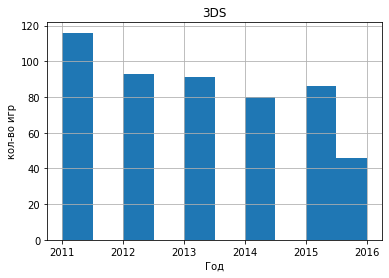

mean = 2013.126953125
median = 2013.0
----------------------------------------


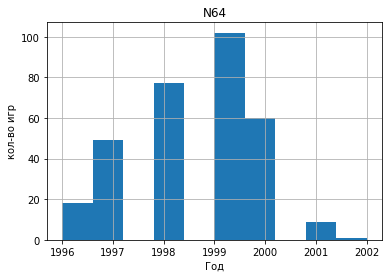

mean = 1998.5316455696202
median = 1999.0
----------------------------------------


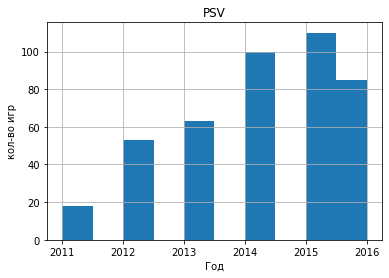

mean = 2014.1328671328672
median = 2014.0
----------------------------------------


In [14]:
for platform in na_of_year['platform'].unique():
    df[df['platform'] == platform]['year_of_release'].hist()
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('кол-во игр')
    plt.show()
    print('mean =',df[df['platform'] == platform]['year_of_release'].mean())
    print('median =',df[df['platform'] == platform]['year_of_release'].median())
    print('-'*40)

In [15]:
vocab = {}
platforms = df['platform'].unique()
for platform in platforms:
    platform_year = {}
    value = Counter(df[df['platform'] == platform]['year_of_release'].values).most_common(1)
    for x in value:
        platform_year[platform] = x[0]
    vocab.update(platform_year)

In [16]:
vocab

{'Wii': 2009,
 'NES': 1986,
 'GB': 2000,
 'DS': 2008,
 'X360': 2011,
 'PS3': 2011,
 'PS2': 2002,
 'SNES': 1995,
 'GBA': 2002,
 'PS4': 2016,
 '3DS': 2011,
 'N64': 1999,
 'PS': 1998,
 'XB': 2003,
 'PC': 2011,
 '2600': 1981,
 'PSP': 2006,
 'XOne': 2016,
 'WiiU': 2013,
 'GC': 2002,
 'GEN': 1994,
 'DC': 2000,
 'PSV': 2015,
 'SAT': 1995,
 'SCD': 1994,
 'WS': 2000,
 'NG': 1994,
 'TG16': 1995,
 '3DO': 1995,
 'GG': 1992,
 'PCFX': 1996}

Заполнять отсутствующие года выпуска буду по году, с максимальным количеством выпущенных игр на каждой платформе за год.<br>
По графикам выше видно, что у всех платформ есть выделяющиеся года, представим, что в самые продуктивные года были выпущены игры, по которым нет данных о годе выпуска, то есть еще больше выделим пиковый год у каждой платформы, но из-за небольшого количества пропусков (1.5%) и большого количества платформ, вряд ли данные сильно исказятся.

Заполнил пропуски в годах игр, в названии которых указан год. Из года в названии надо вычесть единицу, потому что обычно игры выпускались на год раньше, чем указан в названии. Все подобные игры это симуляторы спорта.

In [17]:
def set_year(row):
    value = vocab.get(row['platform'])
    row['year_of_release'] = value
    return row
na_of_year = na_of_year.apply(set_year, axis = 1)

In [18]:
na_of_year['year_of_release'].isna().sum()

0

In [19]:
na_of_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2002,Sports,4260000,260000,10000,1,94.0,85,E
377,FIFA Soccer 2004,PS2,2002,Sports,590000,2360000,40000,1,84.0,64,E
456,LEGO Batman: The Videogame,Wii,2009,Action,1800000,970000,0,0,74.0,79,E10+
475,wwe Smackdown vs. Raw 2006,PS2,2002,Fighting,1570000,1020000,0,0,NaN,NaN,NaN
609,Space Invaders,2600,1981,Shooter,2360000,140000,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,2006,Sports,10000,0,0,0,43.0,tbd,E10+
16405,Freaky Flyers,GC,2002,Racing,10000,0,0,0,69.0,65,T
16448,Inversion,PC,2011,Shooter,10000,0,0,0,59.0,67,M
16458,Hakuouki: Shinsengumi Kitan,PS3,2011,Adventure,10000,0,0,0,NaN,NaN,NaN


In [20]:
df[df['year_of_release'].isna() == True] = na_of_year

Пропуски в годах скорее всего появились из-за отсутствия информации о годе выпуска игры в определенном источнике, с которого взяты игры в `na_of_year`.

In [21]:
df[(df['user_score'] == 'tbd') & (df['user_score'].isna() == False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3450000,2590000,0,1,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2080000,1350000,0,1,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1510000,1030000,0,0,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1650000,570000,0,0,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2002,Adventure,2150000,180000,0,0,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,10000,0,0,0,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,10000,0,0,0,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,10000,0,0,0,48,tbd,E
16704,Plushees,DS,2008,Simulation,10000,0,0,0,NaN,tbd,E


tbd может появиться в результате недостаточного количества голосов пользователей для выставления оценки. Возможно, у игр одинаковое количество голосов на краях значений (1 и 10) и система не может определить игру с средней оценкой 5, так как это не корректно. Другим вариантом может быть недостаточное количество оценок из разных регионов для выставления оценки.<br>
Заменим значения tbd средним по жанрам за соответствующий год.

In [22]:
df1 = df[(df['user_score'] != 'tbd') & (df['user_score'].isna() == False)]
df1.user_score = df1.user_score.astype('int')
table_user_score = df1.pivot_table(index = ['platform','year_of_release'], values = 'user_score',aggfunc = 'median').reset_index()

In [23]:
table_user_score['user_score'] = table_user_score['user_score'].round().astype('int')
table_user_score

,platform,year_of_release,user_score
0,3DS,2011,64
1,3DS,2012,75
2,3DS,2013,68
3,3DS,2014,69
4,3DS,2015,76
...,...,...,...
141,XB,2008,55
142,XOne,2013,59
143,XOne,2014,70
144,XOne,2015,66


In [24]:
def user_score(row):
    try:
        row['user_score'] = (table_user_score[(table_user_score['platform'] == row['platform']) &\
                            (table_user_score['year_of_release'] == row['year_of_release'])]['user_score'].values)[0]
    except:
        pass
    return row
df[df['user_score'] == 'tbd'] = df[df['user_score'] == 'tbd'].apply(lambda x: user_score(x), axis = 1)

Заменили все возможные tbd на среднее значение по жанрам в году.

In [25]:
df[(df['user_score'] == 'tbd') & (df['user_score'].isna() == False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2179,Just Dance 2016,Wii,2015,Misc,410000,460000,0,0,NaN,tbd,E10+
7681,Ratatouille,GBA,2007,Action,140000,50000,0,0,65,tbd,E
8009,Just Dance 2017,Wii,2016,Misc,60000,110000,0,0,NaN,tbd,E10+
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015,Action,0,30000,0,0,NaN,tbd,E
16312,Monster High: New Ghoul in School,Wii,2015,Action,0,10000,0,0,NaN,tbd,E


Удалим оставшиеся игры, по которым не можем предсказать оценки. Их мало, поэтому ничего не теряем.

In [26]:
df = df[df['user_score'] != 'tbd']

In [27]:
len(df)

16708

Сократилась длина на 5, всё в порядке.

In [28]:
df['user_score'] = df['user_score'].astype('Int64')

In [29]:
df.dtypes

name               object
platform           object
year_of_release     Int64
genre              object
na_sales            Int64
eu_sales            Int64
jp_sales            Int64
other_sales         Int64
critic_score        Int64
user_score          Int64
rating             object
dtype: object

Теперь все типы соответствуют требованиям.

In [30]:
df[(df['user_score'].isna() == True) | (df['critic_score'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,1,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23200000,2260000,4220000,1,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26930000,630000,280000,0,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9050000,10950000,1930000,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0,10000,0,0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,10000,0,0,0,NaN,NaN,NaN


пропуски в оценках есть и у старых, и у новых игр, которые как и покупали часто, так и почти не покупали. Возможно данные взяты с источника без оценок игр. У новых игр возможно еще не выставлены оценки из-за выхода игры в 2016, по которому нет данных, либо игру еще не оценивали.<br>
Заполним средними по жанрам за соответствующий год.

In [31]:
df2 = df[df['critic_score'].isna() == False]
table_critic_score = df2.pivot_table(index = ['platform','year_of_release'], values = 'critic_score',aggfunc = 'median').reset_index()

In [32]:
table_critic_score['critic_score'] = table_critic_score['critic_score'].round().astype('int')
table_critic_score

,platform,year_of_release,critic_score
0,3DS,2011,61
1,3DS,2012,73
2,3DS,2013,68
3,3DS,2014,66
4,3DS,2015,72
...,...,...,...
132,XB,2007,76
133,XOne,2013,74
134,XOne,2014,76
135,XOne,2015,76


In [33]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513048
user_score         0.400946
rating             0.404836
dtype: float64

In [34]:
def critic_and_user_score(row):
    try:
        row['critic_score'] =  (table_critic_score[(table_critic_score['platform'] == row['platform']) & \
                            (table_critic_score['year_of_release'] == row['year_of_release'])]['critic_score'].values)[0]
    except:
        pass
    return row

In [35]:
df[df['critic_score'].isna() == True] = df[df['critic_score'].isna() == True].progress_apply(
    lambda x: critic_and_user_score(x), axis = 1)

100%|██████████| 8572/8572 [00:21<00:00, 400.95it/s]


In [36]:
df[df['user_score'].isna() == True] = df[df['user_score'].isna() == True].progress_apply(lambda x: user_score(x), axis = 1)

100%|██████████| 6699/6699 [00:16<00:00, 397.02it/s]


In [37]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.088880
user_score         0.075353
rating             0.404836
dtype: float64

In [38]:
df[(df['critic_score'].isna() == True) | (df['user_score'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,1,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23200000,2260000,4220000,1,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26930000,630000,280000,0,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9000000,6180000,7200000,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16666,Psychic Detective,PS,1995,Adventure,10000,0,0,0,NaN,NaN,NaN
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0,0,10000,0,NaN,41,NaN
16693,PGA European Tour,N64,2000,Sports,10000,0,0,0,NaN,NaN,NaN
16694,Carmageddon 64,N64,1999,Action,10000,0,0,0,NaN,NaN,NaN


В оставшихся пропусках нас будут интересовать только значения за актуальный период, который будет выделен далее, но мы его уже знаем, поэтому можно пропустить заполнение пропусков ранее актуального периода.

In [39]:
df[(df['critic_score'].isna() == True) | (df['user_score'].isna() == True)].query('year_of_release >= 2012')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
359,Just Dance 2014,Wii,2013,Misc,1880000,1390000,0,0,NaN,62,E10+
766,Skylanders SWAP Force,Wii,2013,Platform,1210000,750000,0,0,NaN,66,E10+
850,Just Dance 2015,Wii,2014,Misc,990000,850000,0,0,NaN,84,E10+
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1140000,400000,0,0,NaN,60,NaN
1158,Disney Infinity,Wii,2013,Action,1050000,410000,0,0,NaN,42,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16612,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,0,0,10000,0,NaN,NaN,NaN
16646,Time Travelers,PSP,2012,Adventure,0,0,10000,0,NaN,60,NaN
16659,Hyakki Yagyou Kaidan Romance,PSP,2012,Action,0,0,10000,0,NaN,60,NaN
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0,0,10000,0,NaN,41,NaN


Заполним оставшиеся пропуски средним по жанру в общем за акутальный период.

In [40]:
skip_genres = df[(df['critic_score'].isna() == True) | (df['user_score'].isna() == True)].query('year_of_release >= 2012').genre.unique()

In [41]:
critic_vocab = {}
user_vocab = {}
for genre in skip_genres:
    critic_vocab[genre] = df.query('year_of_release >= 2012')[df['genre']== genre].critic_score.median()
    user_vocab[genre] = df.query('year_of_release >= 2012')[df['genre']== genre].user_score.median()

In [42]:
print(critic_vocab)
print('')
print(user_vocab)

{'Misc': 73.0, 'Platform': 75.0, 'Shooter': 75.0, 'Action': 73.0, 'Sports': 74.0, 'Adventure': 73.0, 'Strategy': 75.0, 'Simulation': 72.0, 'Fighting': 73.0, 'Role-Playing': 72.0, 'Racing': 74.0}

{'Misc': 71.0, 'Platform': 71.0, 'Shooter': 68.0, 'Action': 71.0, 'Sports': 62.0, 'Adventure': 73.0, 'Strategy': 71.0, 'Simulation': 70.0, 'Fighting': 71.0, 'Role-Playing': 73.0, 'Racing': 66.0}


In [43]:
def set_score(row, vocab, score):
    value = vocab.get(row['genre'])
    row[score] = value
    return row
df[(df['critic_score'].isna() == True) & (df['year_of_release'] >= 2012)] = df[(df['critic_score'].isna() == True) & (df['year_of_release'] >= 2012)].apply(lambda x: set_score(x, critic_vocab,'critic_score'), axis = 1)
df[(df['user_score'].isna() == True) & (df['year_of_release'] >= 2012)] = df[(df['user_score'].isna() == True) & (df['year_of_release'] >= 2012)].apply(lambda x: set_score(x, user_vocab, 'user_score'), axis = 1)

In [44]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.074994
user_score         0.074515
rating             0.404836
dtype: float64

Оставшиеся пропуски в оценках нас не интересует в рамках проекта.<br>
Разберемся с рейтингами.<br>
Повторим всё то же для игр <2012 года.

In [45]:
skip_genres = df[(df['critic_score'].isna() == True) | (df['user_score'].isna() == True)].query('year_of_release < 2012').genre.unique()

critic_vocab = {}
user_vocab = {}
for genre in skip_genres:
    critic_vocab[genre] = df.query('year_of_release < 2012')[df['genre']== genre].critic_score.median()
    user_vocab[genre] = df.query('year_of_release < 2012')[df['genre']== genre].user_score.median()

print(critic_vocab)
print('')
print(user_vocab)

def set_score(row, vocab, score):
    value = vocab.get(row['genre'])
    row[score] = value
    return row
df[(df['critic_score'].isna() == True) & (df['year_of_release'] < 2012)] = df[(df['critic_score'].isna() == True) & (df['year_of_release'] < 2012)].apply(lambda x: set_score(x, critic_vocab,'critic_score'), axis = 1)
df[(df['user_score'].isna() == True) & (df['year_of_release'] < 2012)] = df[(df['user_score'].isna() == True) & (df['year_of_release'] < 2012)].apply(lambda x: set_score(x, user_vocab, 'user_score'), axis = 1)

df.isna().mean()

{'Platform': 69.0, 'Role-Playing': 70.0, 'Puzzle': 66.0, 'Shooter': 71.0, 'Adventure': 68.0, 'Racing': 70.0, 'Action': 67.0, 'Fighting': 71.0, 'Strategy': 71.0, 'Misc': 67.0, 'Sports': 70.0, 'Simulation': 67.0}

{'Platform': 78.0, 'Role-Playing': 76.0, 'Puzzle': 75.0, 'Shooter': 76.0, 'Adventure': 75.0, 'Racing': 77.0, 'Action': 75.0, 'Fighting': 78.0, 'Strategy': 77.0, 'Misc': 74.0, 'Sports': 76.0, 'Simulation': 75.0}


name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.000000
user_score         0.000000
rating             0.404836
dtype: float64

In [46]:
categories = Counter(df['rating']).most_common(6)
categories

[(nan, 5505), ('E', 3987), ('T', 2961), ('M', 1563), ('E10+', 1418), ('EC', 8)]

In [47]:
ratings = df['rating'].unique()
rating = []
for i,k in enumerate(ratings):
    if (i !=1) and (i <5):
        rating.append(k)
rating

['E', 'M', 'T', 'E10+']

In [48]:
len(df[df['rating'].isna() == False])

9944

In [49]:
len(df[df['rating'].isin(rating)])

9929

Оставил 4 категории в которых больше всего значений, по ним будем заполнять пропуски.

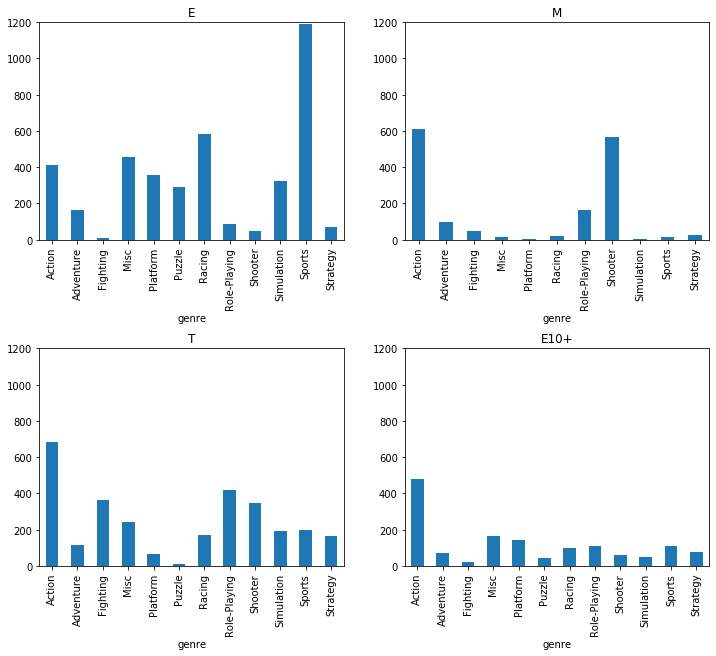

In [50]:
fig,ax = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, subplot in zip(rating, ax.flatten()):
    df[df['rating'] == i].groupby('genre')['name'].agg('count').plot(kind = 'bar', figsize = (12,10), ax = subplot, title = i, ylim = (0,1200))


In [51]:
len(df.query('genre == "Action" and rating == "E10+"'))/ len(df[df['genre'] == 'Action']) 

0.14289958407605466

Точно можно присваивать рейтинг E спортивному жанру и гонкам, платформерам, misc, puzzle, M шутерам, Т fighting, role-play, strategy, simulation, adventure отнесем к Т (одинаковое кол-во с Е, выберем возраст повыше), проблемы с выбором категории у action, во всех категориях примерно одинаково игр с данным жанром. Выберем Е для action, чтобы была примерная середина возраста, при этом в среднем 14% игр будет на самом деле иметь рейтинг выше.

In [52]:
rating_vocab = {'E' : ['Sports', 'Racing', 'Platform', 'Misc', 'Puzzle', 'Action'], 'M' : ['Shooter'], 'T' : ['Role-Playing', 'Strategy', 'Simulation', 'Adventure','Fighting']}

In [53]:
def set_rating(row):
    for rating,genre in rating_vocab.items():
        if row['genre'] in genre:
            row['rating'] = rating
    return row
df[df['rating'].isna()] = df[df['rating'].isna()].apply(set_rating, axis = 1)

In [54]:
df.isna().mean()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

In [55]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Добавил столбец с общим количеством продаж

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ данных.</a><br>
<a href='#step_4'>Шаг 4. Проверка гипотез.</a><br>
<a href='#step_5'>Вывод.</a><br>
<a id = "step_3"></a>

## Исследовательский анализ данных.

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step_5'>Вывод.</a>

<a id = 'step_3'></a>

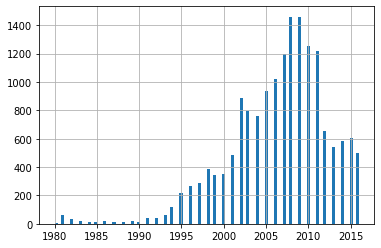

In [56]:
df['year_of_release'].hist(bins = 100)

нас будут интересовать данные c 2012 года, когда количество выпускаемых игр стало резко меньше и вышло на плато.

В среднем срок жизни платформы 9-11 лет. Взлет новой платформы в среднем составляет от 1 до 3 лет.

In [57]:
df_actual = df.query('year_of_release >= 2012')

Выделил данные по продажам за 2012 год и далее, которые будут актуальны для дальнейшего анализа.

In [58]:
platform_sales = df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

In [59]:
most_popular = platform_sales.index[:6]

In [60]:
most_popular

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU'], dtype='object', name='platform')

Возьмем первые 6 популярных платформ.

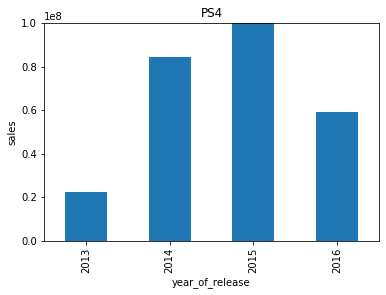

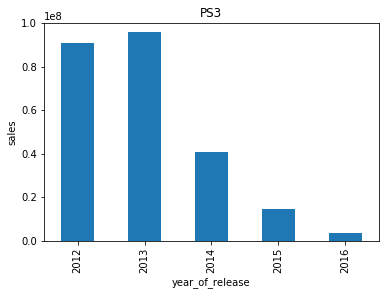

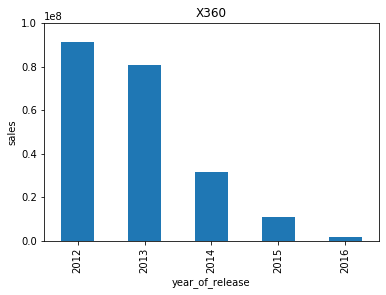

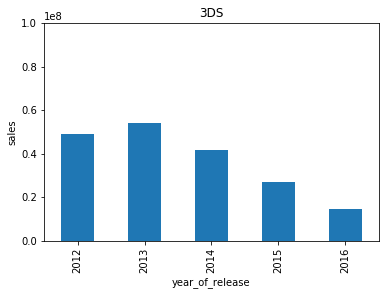

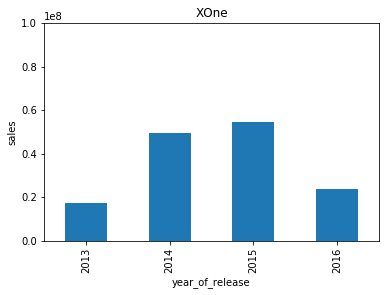

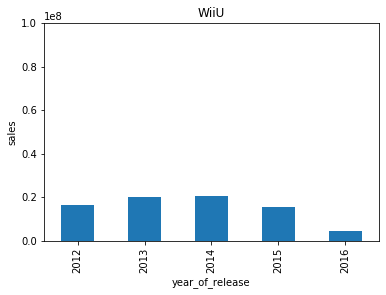

In [61]:
for platform in most_popular:
    df_actual[df_actual['platform'] == platform].groupby('year_of_release')['total_sales'].agg('sum').plot(kind = 'bar', ylim = (0,100000000))
    plt.title(platform)
    plt.ylabel('sales')
    plt.show()

Выберем XOne, 3DS, PS4 как потенциально прибыльные на фоне остальных.

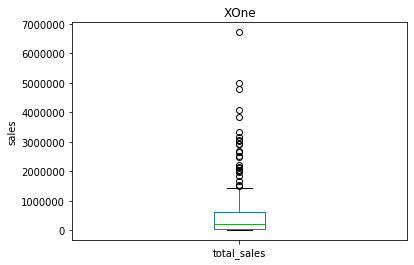

count    2.470000e+02
mean     5.872470e+05
std      9.424116e+05
min      1.000000e+04
25%      5.000000e+04
50%      2.000000e+05
75%      6.250000e+05
max      6.710001e+06
Name: total_sales, dtype: float64


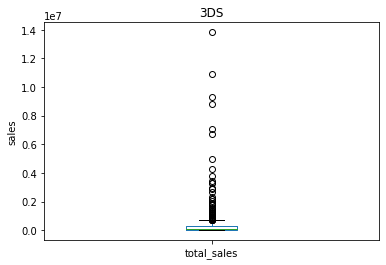

count    3.960000e+02
mean     4.690404e+05
std      1.312500e+06
min      1.000000e+04
25%      4.000000e+04
50%      1.100000e+05
75%      3.000000e+05
max      1.382000e+07
Name: total_sales, dtype: float64


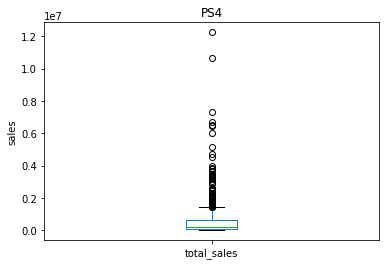

count    3.920000e+02
mean     6.780358e+05
std      1.355221e+06
min      1.000000e+04
25%      5.000000e+04
50%      1.700000e+05
75%      6.125000e+05
max      1.225000e+07
Name: total_sales, dtype: float64


In [62]:
for platform in ['XOne', '3DS', 'PS4']:
    df_actual[df_actual['platform'] == platform]['total_sales'].plot(kind = 'box')
    plt.title(platform)
    plt.ylabel('sales')
    plt.show()
    print(df_actual[df_actual['platform'] == platform]['total_sales'].describe())

среднее всех платформ находится в диапозоне 460-680 тыс. копий. у PS4 среднее кол-во продаж выше остальных, выделим её как самую прибыльную.

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.248961 -0.208306 -0.060993    -0.139016   
na_sales               -0.248961  1.000000  0.785362  0.472981     0.822409   
eu_sales               -0.208306  0.785362  1.000000  0.464563     0.828438   
jp_sales               -0.060993  0.472981  0.464563  1.000000     0.430252   
other_sales            -0.139016  0.822409  0.828438  0.430252     1.000000   
critic_score           -0.030858  0.315633  0.294637  0.254882     0.251841   
user_score              0.180484 -0.044425 -0.070444  0.148913    -0.056234   
total_sales            -0.234974  0.924729  0.960270  0.532665     0.871830   

                 critic_score  user_score  total_sales  
year_of_release     -0.030858    0.180484    -0.234974  
na_sales             0.315633   -0.044425     0.924729  
eu_sales             0.294637   -0.070444     0.960270  
jp_sales             0.254882    0.148913     0.532665  
oth

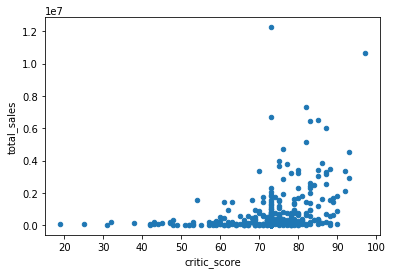

In [63]:
print(df_actual[df['platform'] == 'PS4'].corr())
df_actual[df['platform'] == 'PS4'].plot(kind = 'scatter', y = 'total_sales', x = 'critic_score')

Корреляция между оценкой критиков и кол-вом продаж небольшая положительная, нельзя утверждать, что есть явная связь, но, возможно, она есть в какой-то степени, корреляция с оценками пользователей маленькая отриацтельная, вероятно, что никакой связи нет. Выглядит логично, часто влияние оказывает мнение экспертов и бывает, что влияет мнение покупателей.

XOne
                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.242667 -0.194925 -0.127050     0.003257   
na_sales               -0.242667  1.000000  0.765367  0.425725     0.426813   
eu_sales               -0.194925  0.765367  1.000000  0.421071     0.332483   
jp_sales               -0.127050  0.425725  0.421071  1.000000     0.106916   
other_sales             0.003257  0.426813  0.332483  0.106916     1.000000   
critic_score            0.063963  0.298422  0.309587  0.179831     0.011092   
user_score              0.073488 -0.072578 -0.062731  0.057128     0.001018   
total_sales            -0.238635  0.968160  0.902079  0.453563     0.415068   

                 critic_score  user_score  total_sales  
year_of_release      0.063963    0.073488    -0.238635  
na_sales             0.298422   -0.072578     0.968160  
eu_sales             0.309587   -0.062731     0.902079  
jp_sales             0.179831    0.057128     0.453563 

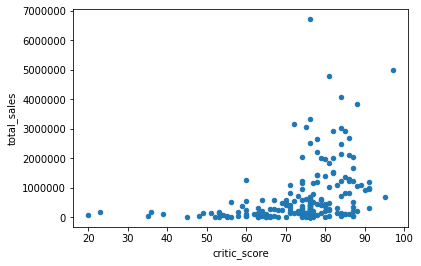

----------------------------------------
3DS
                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.082787 -0.086559 -0.033883    -0.048998   
na_sales               -0.082787  1.000000  0.931508  0.666101     0.764311   
eu_sales               -0.086559  0.931508  1.000000  0.684292     0.786419   
jp_sales               -0.033883  0.666101  0.684292  1.000000     0.483539   
other_sales            -0.048998  0.764311  0.786419  0.483539     1.000000   
critic_score           -0.004240  0.122687  0.102384  0.122003     0.009103   
user_score              0.091572  0.045076  0.018895  0.089062    -0.019164   
total_sales            -0.071052  0.933635  0.936056  0.877384     0.724795   

                 critic_score  user_score  total_sales  
year_of_release     -0.004240    0.091572    -0.071052  
na_sales             0.122687    0.045076     0.933635  
eu_sales             0.102384    0.018895     0.936056  
jp_sales       

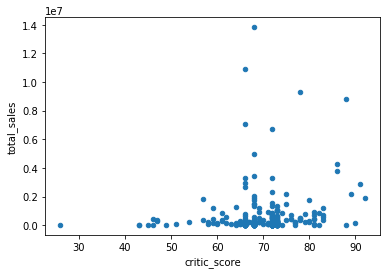

----------------------------------------


In [64]:
for platform in ['XOne', '3DS']:
    print(platform)
    print(df_actual[df['platform'] == platform].corr())
    df_actual[df['platform'] == platform].plot(kind = 'scatter', y = 'total_sales', x = 'critic_score')
    plt.show()
    print('-'*40)

Те же значения корреляции наблюдаются на платформе XOne, у 3DS коэффициенты корреляции меньше, возможно никакой связи между оценкой критиков и кол-вом продаж на этой платформе нет, стоит отметить, что на этой платформе корреляция с оценкой пользователя положительная, но все равно очень маленькая.

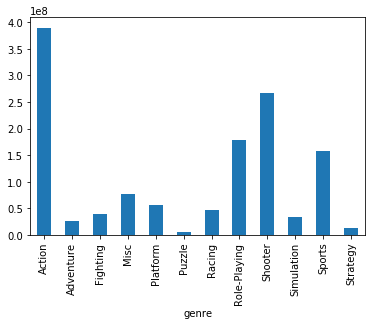

In [65]:
df_actual.groupby('genre')['total_sales'].agg('sum').plot(kind = 'bar')

In [66]:
df_actual[df_actual['genre'] == 'Puzzle']['total_sales'].sum()

4670000

Самые частый и прибыльныq жанр - action, почти 400 миллионов продаж. Он сильно выделяются на общем фоне, как и самый редкий - puzzle, 4.7 миллиона.

## Картины пользователей

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step_5'>Вывод.</a>

<a id = 'step_4'></a>

In [67]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    print('top 5 platform in '+region.split('_')[0])
    display(df_actual.groupby('platform')[region].agg('sum').sort_values(ascending = False).head(5))
    print('-'*40)

top 5 platform in na


platform
X360    140050000
PS4     108740000
PS3     103380000
XOne     93120000
3DS      55310000
Name: na_sales, dtype: Int64

----------------------------------------
top 5 platform in eu


platform
PS4     141090000
PS3     106860000
X360     74520000
XOne     51590000
3DS      42640000
Name: eu_sales, dtype: Int64

----------------------------------------
top 5 platform in jp


platform
3DS     87790000
PS3     35290000
PSV     21110000
PS4     15960000
WiiU    13010000
Name: jp_sales, dtype: Int64

----------------------------------------


топ 5 платформ по регионам. В каждом регионе преобладает над другими разные платформы. Во всех регионах PS3 держится в топ 2-3 рейтинга. В Японии XOne и X360 не распространенны, а в Америке и Европе нет Wii.

In [68]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    print('top 5 genres in '+region.split('_')[0])
    display(df_actual.groupby('genre')[region].agg('sum').sort_values(ascending = False).head(5))
    print('-'*40)

top 5 genres in na


genre
Action          177840000
Shooter         144770000
Sports           81530000
Role-Playing     64110000
Misc             37720000
Name: na_sales, dtype: Int64

----------------------------------------
top 5 genres in eu


genre
Action          159300000
Shooter         113470000
Sports           69090000
Role-Playing     48580000
Racing           27290000
Name: eu_sales, dtype: Int64

----------------------------------------
top 5 genres in jp


genre
Role-Playing    65510000
Action          52800000
Misc            12860000
Simulation      10410000
Fighting         9440000
Name: jp_sales, dtype: Int64

----------------------------------------


Топ 5 жанров по регионам. Во всех регионах в топе держится жанр Экшн. В NA и EU почти одинаковый рейтинг жанров, кроме 5 места. В Японии он отличается и порядком и жанрами.

Видно, что в основном предпочтения жителей NA и EU совпадают и сильно разнятся с JP регионом.

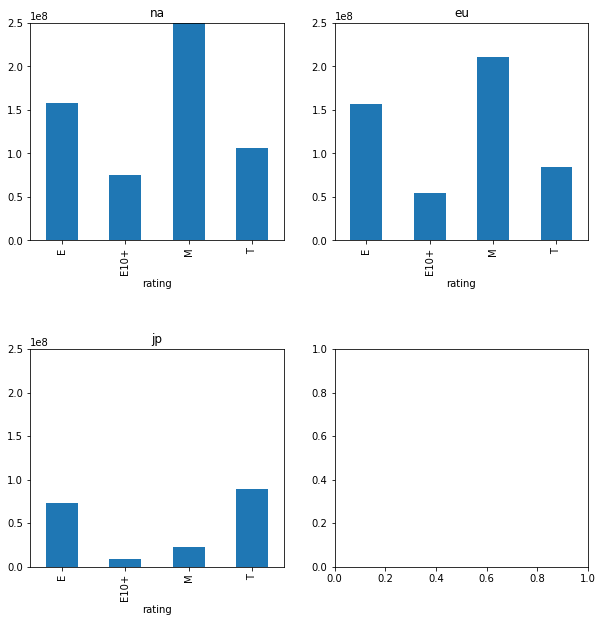

In [69]:
fig,ax = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for region,subplot in zip(regions, ax.flatten()):

    df_actual.groupby('rating')[region].agg('sum').plot(kind = 'bar', ylim = (0,250000000),figsize =(10,10), ax = subplot, title = region.split('_')[0])


Влияние рейтинга на количество покупок наблюдается. В NA и EU тенденция одинаковая (больше покупают игры с рейтингом M, меньше - E10+), но разное количество покупок. В Японии другая тенденция (чаще покупают игры с рейтингом T, реже - E10+). Можно сделать предположение, что во всех регионах реже остальных покупают игры с рейтингом E10+, но, возможно, ситуация бы изменилась, если бы в Японии было большее количество покупок.

## Проверка гипотез.

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step_5'>Вывод.</a>

<a id = 'step_5'></a>

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, альтернативная - разные.

In [70]:
df_pc = df.query('platform == "PC"')
df_xone = df.query('platform == "XOne"')

In [71]:
display(df_pc['user_score'].describe())
df_xone['user_score'].describe()

count    974.000000
mean      71.172485
std       13.933369
min       14.000000
25%       66.000000
50%       75.000000
75%       81.000000
max       93.000000
Name: user_score, dtype: float64

count    247.000000
mean      65.809717
std       11.940581
min       16.000000
25%       61.000000
50%       68.000000
75%       72.000000
max       92.000000
Name: user_score, dtype: float64

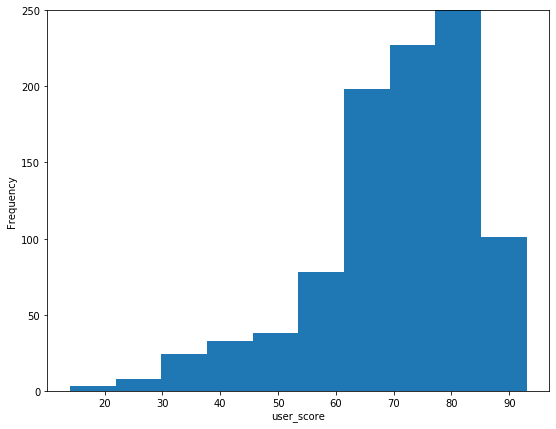

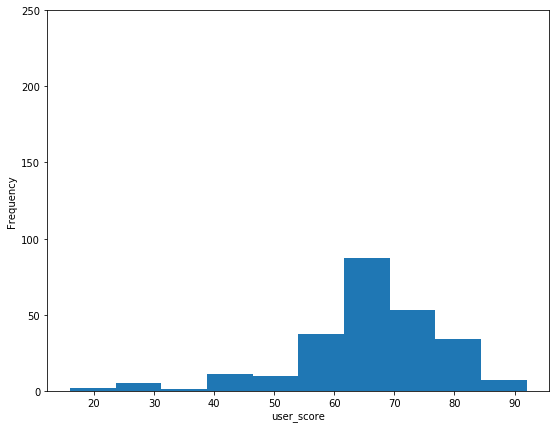

In [72]:
for df in [df_pc, df_xone]:
    df['user_score'].plot(kind = 'hist',figsize =(9,7), ylim = (0,250))
    plt.xlabel('user_score')
    plt.show() 

На основе распределений возьмем equal_var = False. (Возможно, лучше будет взять тест Манна-Уитни)

In [73]:
print('var df_pc = {:.1f}, var df_xone = {:.1f}'.format(df_pc['user_score'].var(), df_xone['user_score'].var()))

var df_pc = 194.1, var df_xone = 142.6


Alpha возьму 0.05 для несильно строго теста.

In [74]:
alpha = 0.05
results = st.ttest_ind(df_pc['user_score'], df_xone['user_score'], equal_var = False)
print('pvalue = ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

pvalue =  2.561043099244552e-09
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC разные. 

In [75]:
df_action = df.query('genre =="Action"')
df_sports = df.query('genre =="Sports"')

In [76]:
display(df_action['user_score'].describe())
df_sports['user_score'].describe()

count    85.000000
mean     67.388235
std       9.389830
min      31.000000
25%      66.000000
50%      68.000000
75%      71.000000
max      88.000000
Name: user_score, dtype: float64

count    38.000000
mean     56.815789
std      12.668017
min      21.000000
25%      54.250000
50%      59.500000
75%      63.750000
max      83.000000
Name: user_score, dtype: float64

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые, альтернативная - разные.<br>
Дисперсии одинаковые, потому что примерно равны станд. отклонения.

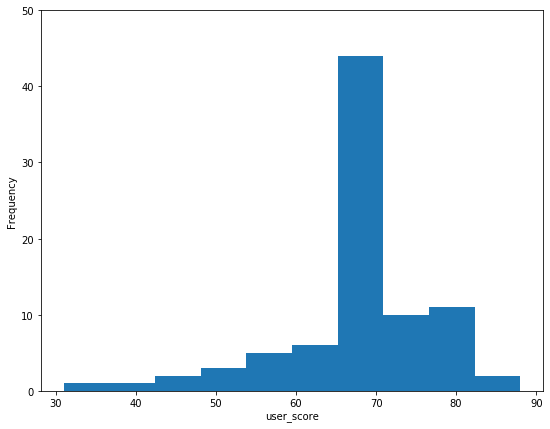

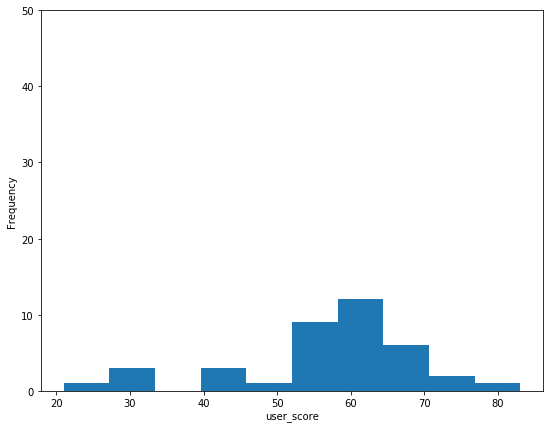

In [77]:
for df in [df_action, df_sports]:
    df['user_score'].plot(kind = 'hist',figsize =(9,7), ylim = (0,50))
    plt.xlabel('user_score')
    plt.show() 

In [78]:
print('var df_action = {:.1f}, var df_sports = {:.1f}'.format(df_action['user_score'].var(), df_sports['user_score'].var()))

var df_action = 88.2, var df_sports = 160.5


In [79]:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)
print('pvalue = ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

pvalue =  2.384745082394302e-05
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод.

<a href='#step_1'>Шаг 1. Получение общей информации.</a><br>
<a href='#step_2'>Шаг 2. Предобработка данных.</a><br>
<a href='#step_3'>Шаг 3. Исследовательский анализ</a><br>
<a href='#step_4'>Шаг 4. Картины пользователей</a><br>
<a href='#step_5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step_6'>Вывод.</a>

<a id = 'step_6'></a>

<p>С первого взгляда на таблицу можно заметить разный регистр в названиях столбцов, пропуски в данных, количество копий в млн. неудобно для дальенйших расчетов, оценки критиков и пользователей в разных форматах.</p>

<p>Были приведены к нижнему регистру названия столбцов и проверены глазами возможные наименования платформы на наличие разных регистров у одного названия.</p>

<p>Тип year_of_release переведен в int, все *_sales в int с домножением на миллион, critic_score в int, user_score в int с домножением на 10 для одинакового формата с оценками критиков</p>

<p>Заполнил пропуски в годах игр, в названии которых указан год. Из года в названии надо вычесть единицу, потому что обычно игры выпускались на год раньше, чем указан в названии. Все подобные игры это симуляторы спорта.</p>

<p>Пропуски в годах скорее всего появились из-за отсутствия информации о годе выпуска игры в определенном источнике</p>

<p>tbd может появиться в результате недостаточного количества голосов пользователей для выставления оценки. Возможно, у игр одинаковое количество голосов на краях значений (1 и 10) и система не может определить игру с средней оценкой 5, так как это не корректно. Другим вариантом может быть недостаточное количество оценок из разных регионов для выставления общей оценки.<br>
Заменил значения tbd средним по жанрам за соответствующий год.</p>

<p>Удалил оставшиеся игры, по которым нельщя предсказать оценки. Их мало, поэтому ничего не теряется.</p>

<p>Пропуски в оценках есть и у старых, и у новых игр, которые как и покупали часто, так и почти не покупали. Возможно данные взяты с источника без оценок игр. У новых игр возможно еще не выставлены оценки из-за выхода игры в 2016, по которому нет данных, либо игру еще не оценивали.<br>

Заполнил средними по жанрам за соответствующий год. Заполним оставшиеся пропуски средним по жанру в общем за акутальный период. Нас будут интересовать данные c 2012 года, когда количество выпускаемых игр стало резко меньше и вышло на плато. Повторил всё то же для игр меньше 2012 года выпуска.</p>
<p>Выделил 4 категории в которых больше всего значений, по ним будем заполнять пропуски.<br>
Точно можно присваивать рейтинг E спортивному жанру и гонкам, платформерам, misc, puzzle, M шутерам, Т fighting, role-play, strategy, simulation, adventure отнесем к Т (одинаковое кол-во с Е, выберем возраст повыше), проблемы с выбором категории у action, во всех категориях примерно одинаково игр с данным жанром. Выберем Е для action, чтобы была примерная середина возраста, при этом в среднем 14% игр будет на самом деле иметь рейтинг выше.</p>

<p>В среднем срок жизни платформы 9-11 лет. Взлет новой платформы в среднем составляет от 1 до 3 лет.</p>

<p>Выбрал XOne, 3DS, PS4 как потенциально прибыльные на фоне остальных. Среднее всех платформ находится в диапозоне 460-680 тыс. копий. у PS4 среднее кол-во продаж выше остальных, выделим её как самую прибыльную.</p>

<p>Корреляция между оценкой критиков и кол-вом продаж небольшая положительная, нельзя утверждать, что есть явная связь, но, возможно, она есть в какой-то степени, корреляция с оценками пользователей маленькая отриацтельная, вероятно, что никакой связи нет. Выглядит логично, часто влияние оказывает мнение экспертов и бывает, что влияет мнение покупателей.<br>
Те же значения корреляции наблюдаются на платформе XOne, у 3DS коэффициенты корреляции меньше, возможно никакой связи между оценкой критиков и кол-вом продаж на этой платформе нет, стоит отметить, что на этой платформе корреляция с оценкой пользователя положительная, но все равно очень маленькая.</p>

<p>Самые частый и прибыльныq жанр - action, почти 400 миллионов продаж. Он сильно выделяются на общем фоне, как и самый редкий - puzzle, 4.7 миллиона.</p>

<p>Выделил топ 5 платформ по регионам. В каждом регионе преобладают над другими разные платформы. Во всех регионах PS3 держится в топ 2-3 рейтинга. В Японии XOne и X360 не распространенны, а в Америке и Европе нет Wii.<br>
Выделил топ 5 жанров по регионам. Во всех регионах в топе держится жанр Экшн. В NA и EU почти одинаковый рейтинг жанров, кроме 5 места. В Японии он отличается и порядком и жанрами.<br>

Заметно, что в основном предпочтения жителей NA и EU совпадают и сильно разнятся с JP регионом.</p>

<p>Влияние рейтинга на количество покупок наблюдается. В NA и EU тенденция одинаковая (больше покупают игры с рейтингом M, меньше - E10+), но разное количество покупок. В Японии другая тенденция (чаще покупают игры с рейтингом T, реже - E10+). Можно сделать предположение, что во всех регионах реже остальных покупают игры с рейтингом E10+, но, возможно, ситуация бы изменилась, если бы в Японии было большее количество покупок.</p>

Проверены гипотезы, дисперсии взяты одинаковые, потому что примерно равны станд. отклонения, и сделаны выводы:<ul>
   <li> средние пользовательские рейтинги платформ Xbox One и PC разные.</li>
    <li>средние пользовательские рейтинги жанров Action и Sports разные.</li></ul>